# A1.Find the first derivative of your speech signal with finite difference method. Listen to the first derivative signal and the original speech signal.

/var/folders/y7/tsm359x90db8sg8s759k7zym0000gn/T/ipykernel_33745/4030786587.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('audio_sample.m4a')
/Users/thanujbusa/miniconda3/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Playing First Derivative Signal:


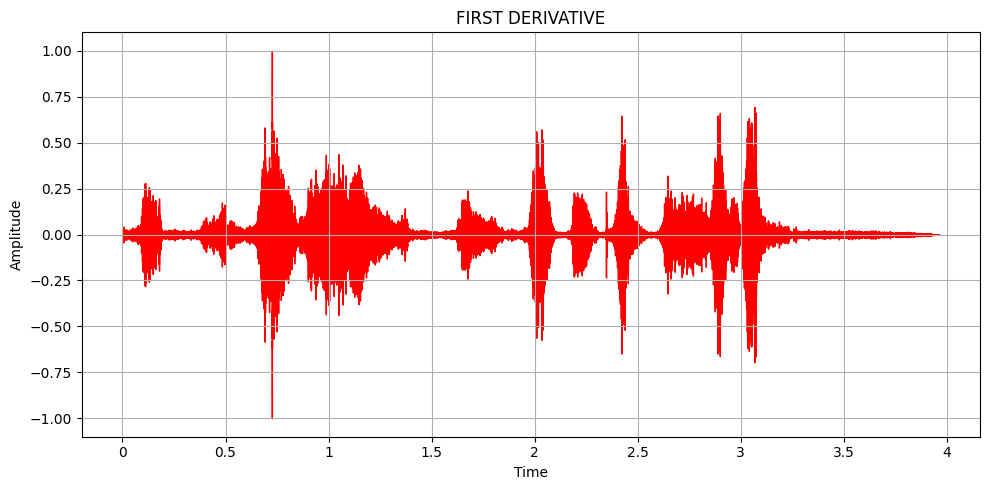

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

y, sr = librosa.load('audio_sample.m4a')
derivative_1 = np.diff(y)
derivative_1 /= np.max(np.abs(derivative_1))

print("Playing First Derivative Signal:")

plt.figure(figsize=(10, 5))
librosa.display.waveshow(derivative_1, sr=sr,color='red')
plt.title('FIRST DERIVATIVE')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

ipd.Audio(derivative_1, rate=sr)


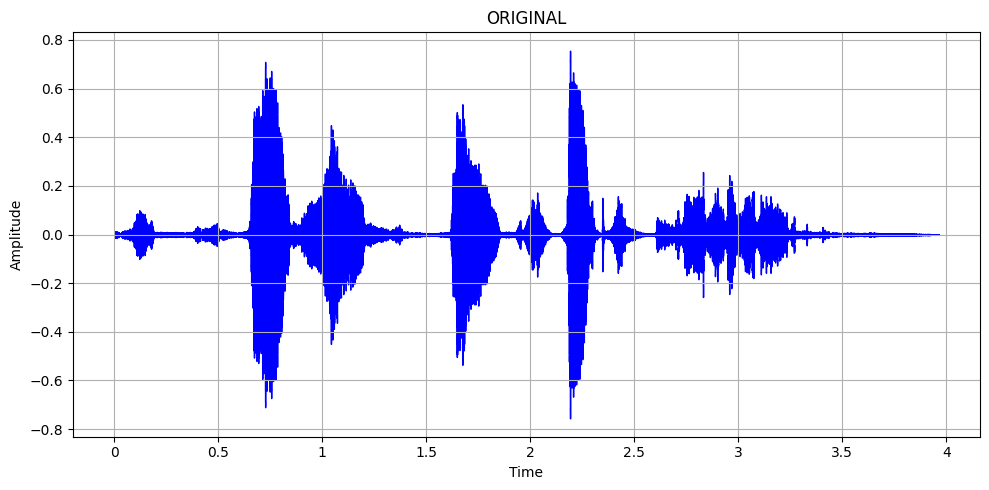

In [4]:
#ORIGINAL 
plt.figure(figsize=(10, 5))
librosa.display.waveshow(y, sr=sr,color='blue')
plt.title('ORIGINAL')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

ipd.Audio(y, rate=sr)

# A2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 3.018615092384735


/Users/thanujbusa/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/thanujbusa/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/y7/tsm359x90db8sg8s759k7zym0000gn/T/ipykernel_33745/3820609850.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'green')
/var/folders/y7/tsm359x90db8sg8s759k7zym0000gn/T/ipykernel_33745/3820609850.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions), len(speech_re

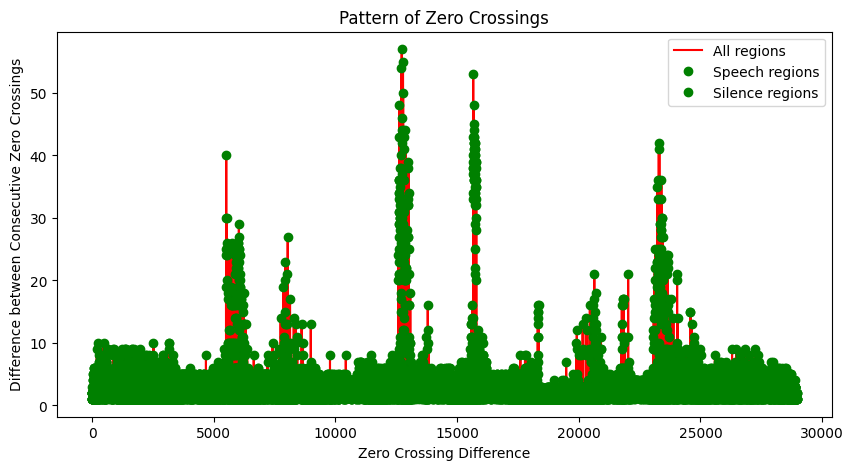

Pattern of Zero Crossings:
All regions: [2 2 1 ... 1 2 1]
Speech regions: []
Silence regions: [2 2 1 ... 1 2 1]


In [5]:
zero_crossing = np.where(np.diff(np.sign(derivative_1)))[0]
diff = np.diff(zero_crossing)
threshold = 1000
speech_regions = diff[diff > threshold]
silence_regions = diff[diff <= threshold]

avg_length_speech = np.mean(speech_regions)
avg_length_silence = np.mean(silence_regions)

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)

plt.figure(figsize=(10, 5))
plt.plot(diff, label='All regions',color = 'red')
plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'green')
plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'green')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Zero Crossing Difference')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

print("Pattern of Zero Crossings:")
print("All regions:", diff)
print("Speech regions:", speech_regions)
print("Silence regions:", silence_regions)


# A3. Speak 5 of your favoritewords. Observe the length of the speech signals. Compare the lengths of your spoken words with those of your projectteam-mate.

Lengths of the spoken words MINE: [2.684, 2.108, 1.98, 2.492, 2.428]
Lengths of the spoken words TeamMate: [1.724, 2.428, 2.492, 2.364, 2.364]


/var/folders/y7/tsm359x90db8sg8s759k7zym0000gn/T/ipykernel_33745/663650055.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(word_file, sr=None)
/var/folders/y7/tsm359x90db8sg8s759k7zym0000gn/T/ipykernel_33745/663650055.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(word_file, sr=None)


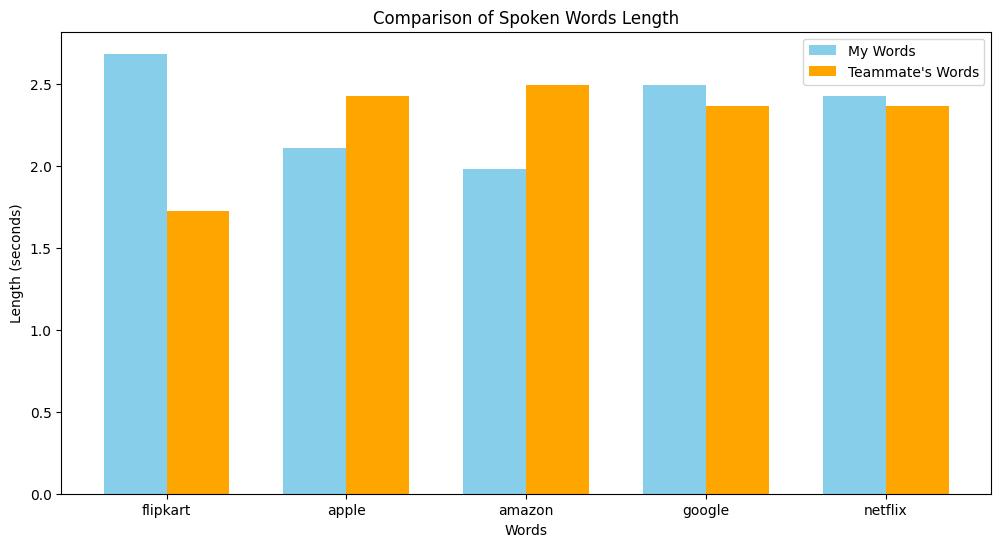

In [7]:

word_files_mine = ['t-flipkart.m4a', 't-apple.m4a', 't-amazon.m4a', 't-google.m4a', 't-netflix.m4a']
word_files_team_mate = ['v-flipkart.m4a', 'v-apple.m4a', 'v-amazon.m4a', 'v-google.m4a', 'v-netflix.m4a']
words = ['flipkart', 'apple', 'amazon', 'google', 'netflix']
word_lengths_mine = []
word_lengths_teammate = []

for word_file in word_files_mine:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_mine.append(length_seconds)

for word_file in word_files_team_mate:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_teammate.append(length_seconds)

print("Lengths of the spoken words MINE:", word_lengths_mine)
print("Lengths of the spoken words TeamMate:", word_lengths_teammate)

bar_width = 0.35
index = np.arange(len(words))
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, word_lengths_mine, bar_width, label='My Words', color='skyblue')
plt.bar(index + bar_width/2, word_lengths_teammate, bar_width, label="Teammate's Words", color='orange')
plt.xlabel('Words')
plt.ylabel('Length (seconds)')
plt.title('Comparison of Spoken Words Length')
plt.xticks(index, words)
plt.legend()

plt.show()



# A4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”. Record two signals –one with making the statement while other with asking question. Study the two signals and compare them.

/var/folders/y7/tsm359x90db8sg8s759k7zym0000gn/T/ipykernel_33745/826744733.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  statement, sr1 = librosa.load('question.m4a')
/var/folders/y7/tsm359x90db8sg8s759k7zym0000gn/T/ipykernel_33745/826744733.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  question, sr2 = librosa.load('answer.m4a')


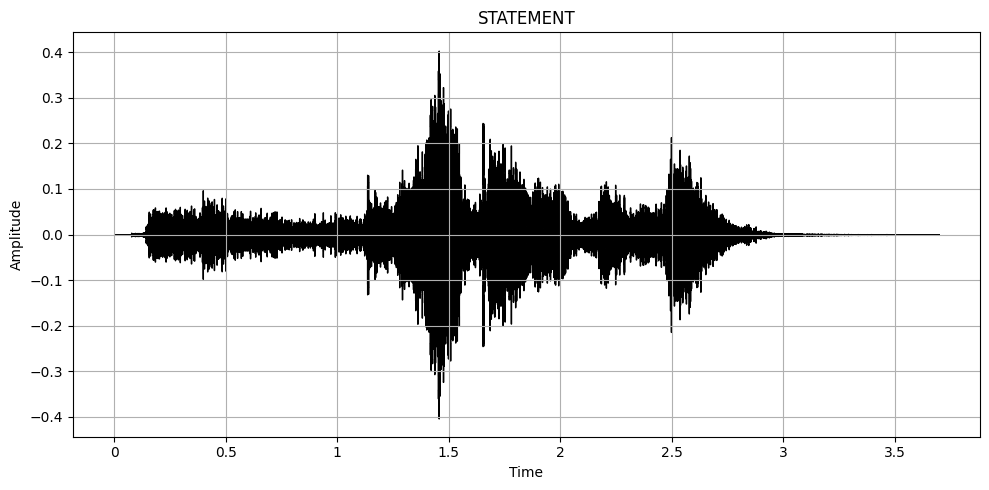

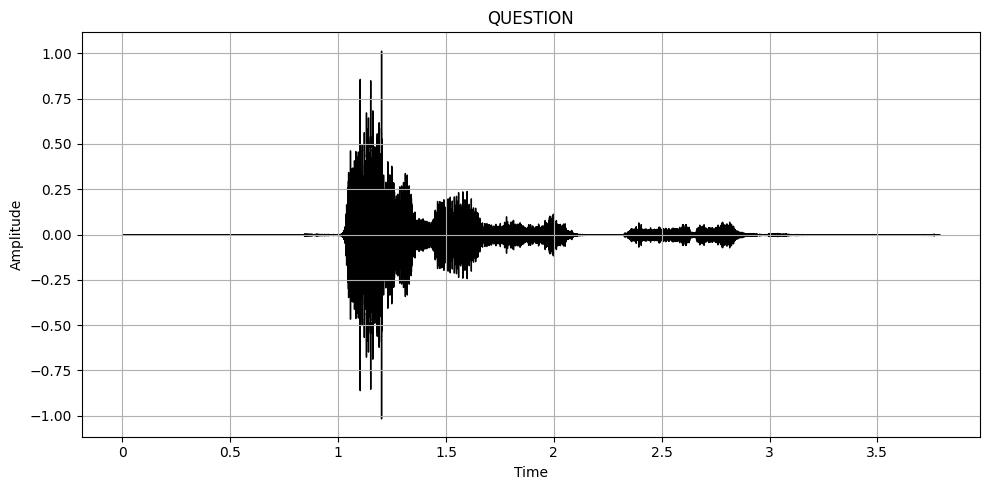

In [10]:
statement, sr1 = librosa.load('question.m4a')
question, sr2 = librosa.load('answer.m4a')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='black')
plt.title('STATEMENT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
librosa.display.waveshow(question, sr=sr,color='black')
plt.title('QUESTION')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()